# Week 5: Unsupervised Learning - Clustering
- Vast majority of available data is unlabelled: Have input $X$ but do not have the labels $y$ (output)

## Clustering
Identifying similar instances and assigning them to clusters (groups)
- Minimise the intra-cluster distances and maximises the inter-cluster distances
- Samples in the same cluster tried to be as similar as possible
- Samples from different clusters to be as different as possible

Great tool for:
- Data analysis
- **Customer segmentation**: Cluster customers based on their purchases and activities on the website (understand customer and what they need, adapt products and marketing campaigns to each cluster)
- **Recommendation systems**: Suggest content/ product that other users in the same cluster like
- **Anomaly detection**: Any instance with a low affinity to all the cluster is likely to be an anomaly (fraud detection)
- **Semi-supervised learning**: Perform clustering and propagate the labels too all the instances in the same cluster (then can apply a supervised learning algorithm, i.e logistic regression)
- **Search engine**: search for image/information similar to a reference input
- **Image segmatation**

## K-Means
A simple algorithm capable of clustering dataset as follows very quickly and efficiently, often in just a few iterations
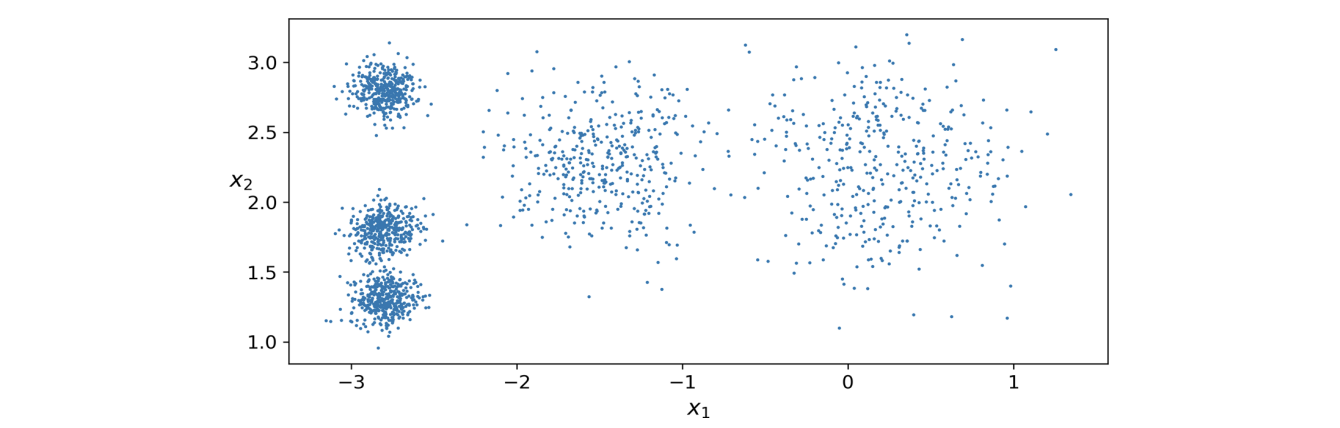

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
print("X:", X) # Location (x_,y_) of a point in Oxy dimension (2D)
print("y:", y) # Allocate the corresponding point to a particular cluster

X: [[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]
y: [4 2 0 ... 3 0 2]


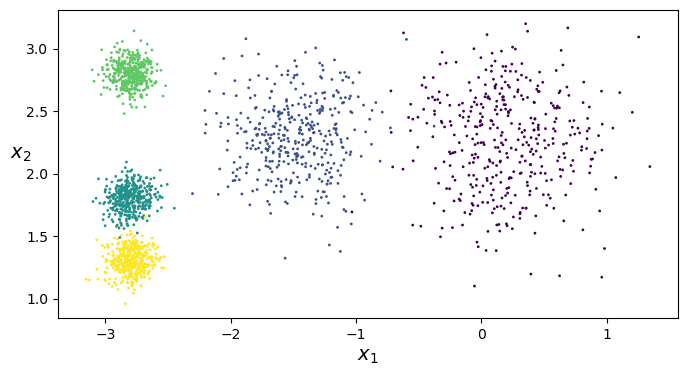

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X,y)
# save_fig("blobs_plot")
plt.show()

In [351]:
from sklearn.cluster import KMeans
# It will find each blon'center and assign each instance to the closey blob

In [353]:
# Fitting stage (Fitting and Predicting at the same time)
# Same random_state to keep the constant outputs 
kmeans = KMeans(n_clusters = len(blob_centers), random_state=7) 
kmeans.fit_predict(X)

array([1, 1, 4, ..., 3, 2, 1], dtype=int32)

In [369]:
# Same as above
kmeans = KMeans(n_clusters = len(blob_centers), random_state=7) 
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 4, ..., 3, 2, 1], dtype=int32)

In [357]:
# Check the original centroids and new centroids (based on random)
print("from X:", kmeans.cluster_centers_)
print("create X by", blob_centers)

from X: [[-1.46871743  2.2864424 ]
 [-2.80214068  1.55162671]
 [ 0.3996969   2.50602047]
 [-2.79290307  2.79641063]
 [ 0.01896307  2.01144566]]
create X by [[ 0.2  2.3]
 [-1.5  2.3]
 [-2.8  1.8]
 [-2.8  2.8]
 [-2.8  1.3]]


In [359]:
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([4, 2, 3, 3], dtype=int32)

### Hard clustering
- Assigning each instance to a single cluster
### Soft clustering
- Giving each instance a score per cluster
- The score can be the **distance** between the instance and the centroid (using $transform()$ method) or can be the **similarity score** (affinity)
- High-dimensional dataset can be transformed this way, to a k-dimensional dataset
- The transformation can be a very efficient nonlinear dimentionality reduction technique

In [361]:
# Remind X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.transform(X_new)

array([[1.49638903, 2.83778629, 0.64483666, 2.9042344 , 0.02214952],
       [4.47788842, 5.81943941, 2.64908153, 5.84739223, 2.9810589 ],
       [1.68937585, 1.4618254 , 3.43539732, 0.29040966, 3.17669289],
       [1.54610257, 0.96879317, 3.39970223, 0.36159148, 3.0582386 ]])

## What if there is no initial centroid points?
- Pick K random points and set them as the cluster centroids
- Assign each data point to the nearest centroid to form K clusters
- Update a centroid
- Back to step 2 to update
- If the centroids do not move much, stop because of its convergence

**Summary**:
- Iteractive algorithm
- Keep iterating until it converges
- Limit the number of iterations by setting its max_iter hyperparameter
- It is guaranteed to converge in a finite number of steps (usually small)

## What if we know initial centroid points?

In [386]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=len(good_init), init=good_init, n_init=1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [390]:
print(kmeans.inertia_) # Inertia is the Mean Square distance between instance and closest centroid
print(kmeans.score(X)) # Negative inertia

211.5985372581684
-211.59853725816834


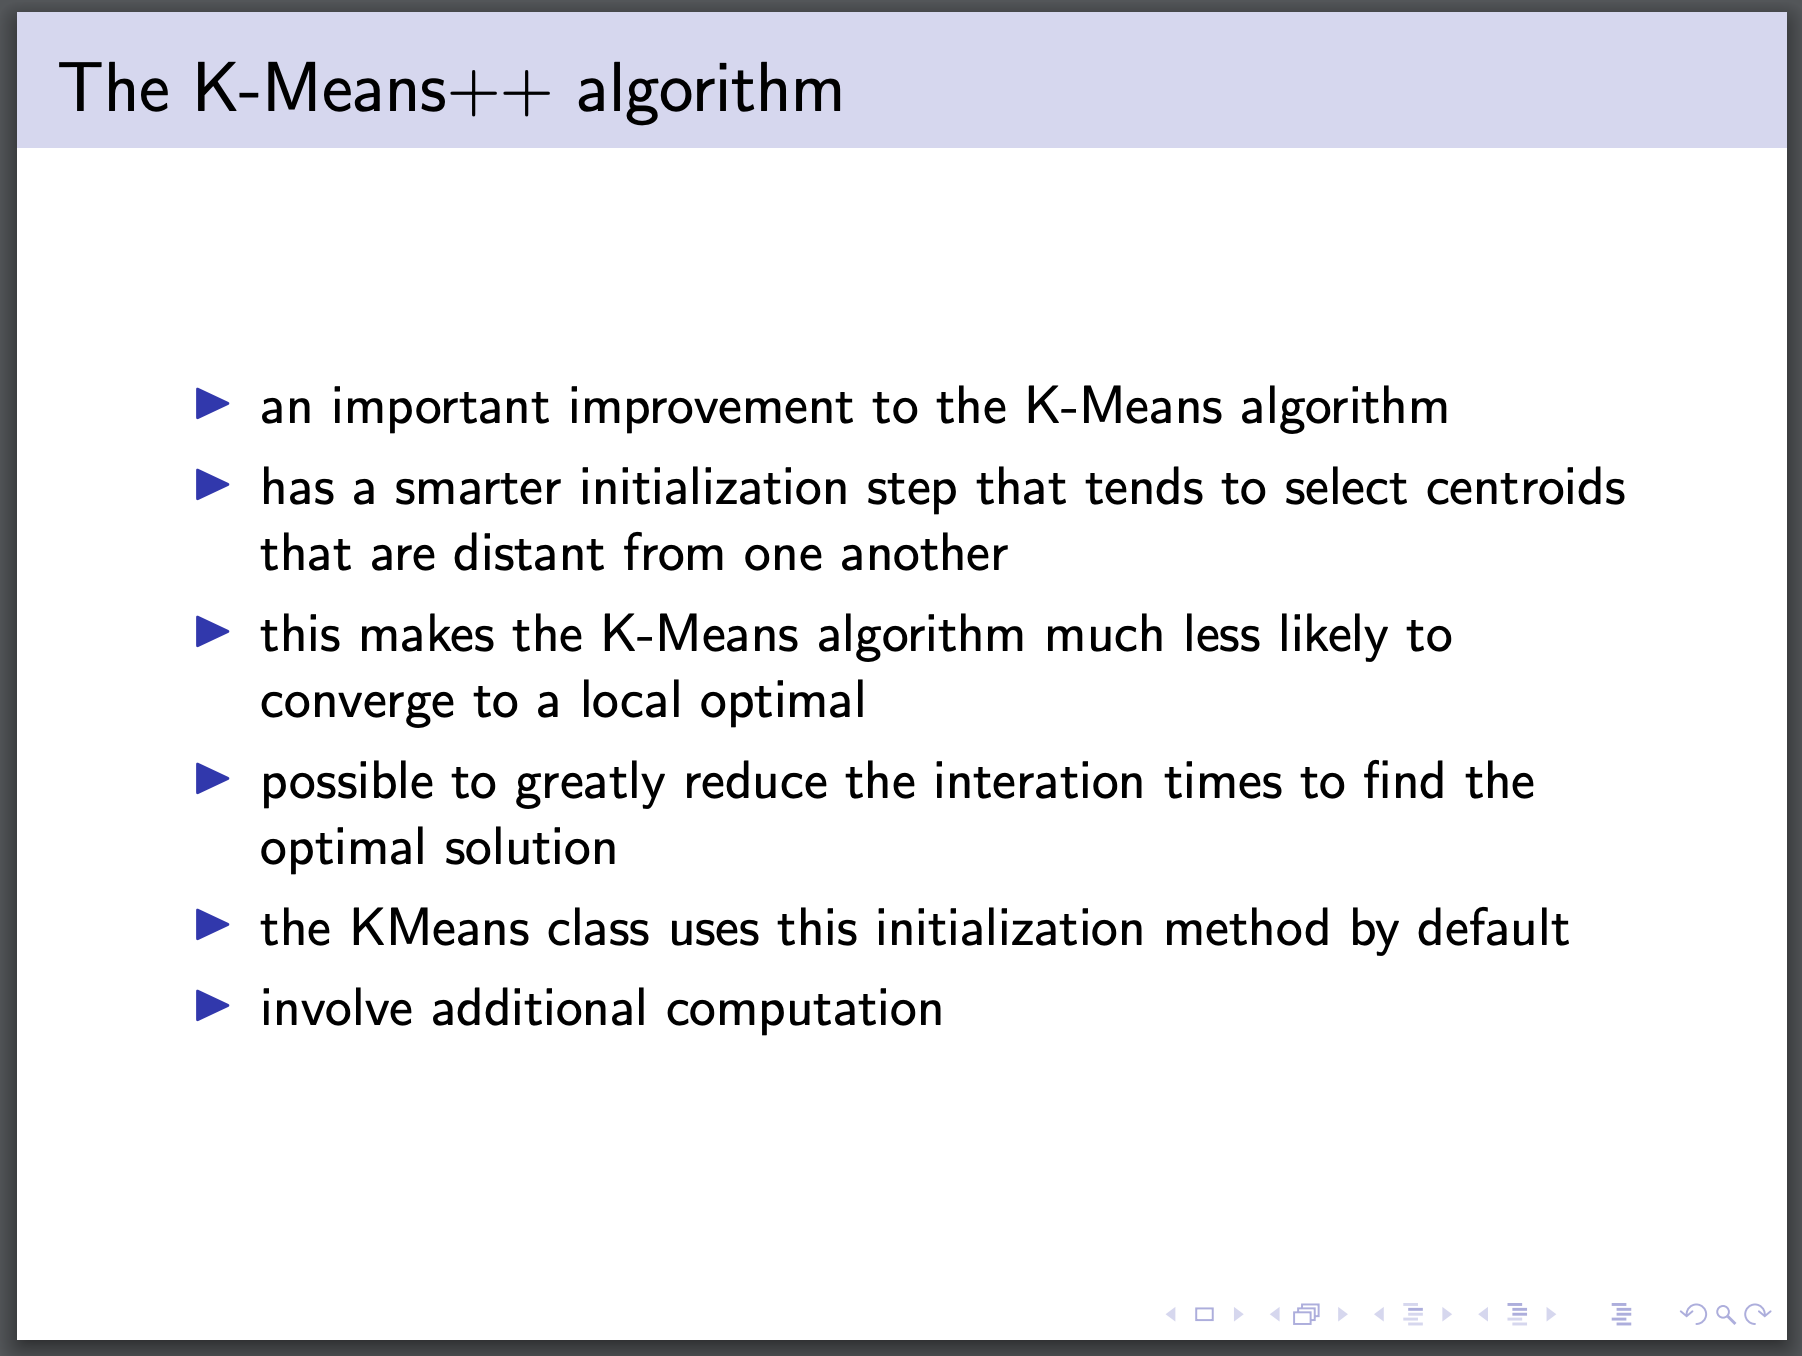

In [467]:
from sklearn.cluster import MiniBatchKMeans

In [408]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

print(minibatch_kmeans.inertia_)

225.7655028762577


## Number of cluster
It is important to define k clusters. The results might be quite bad if setting a wrong value
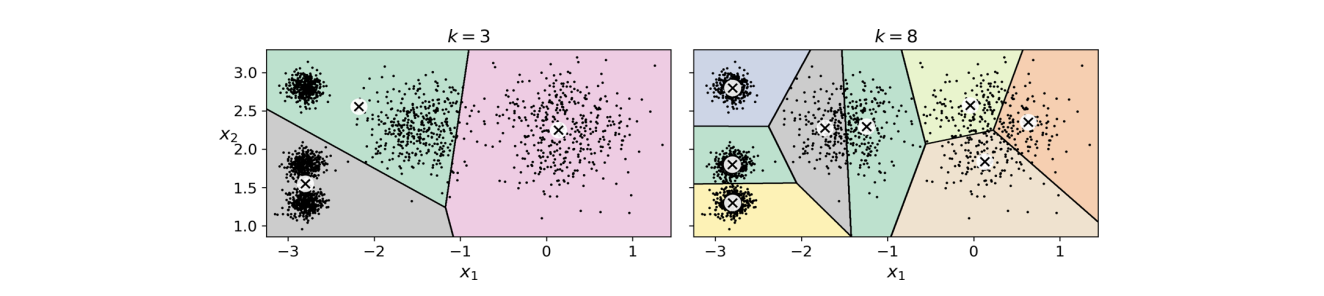

## Plot the inertia as a function of k
- Minimise inertia is not a good performance metric for choosing $k$ because it keeps geeting lower as $k$ increases
- The inertia drops quickly as k increases up to 4
- The it decreases much slowly when keep increasing k
- 4 would be a good choice if not know better
- Any lower value would be dramatic, while any higher value would not much help
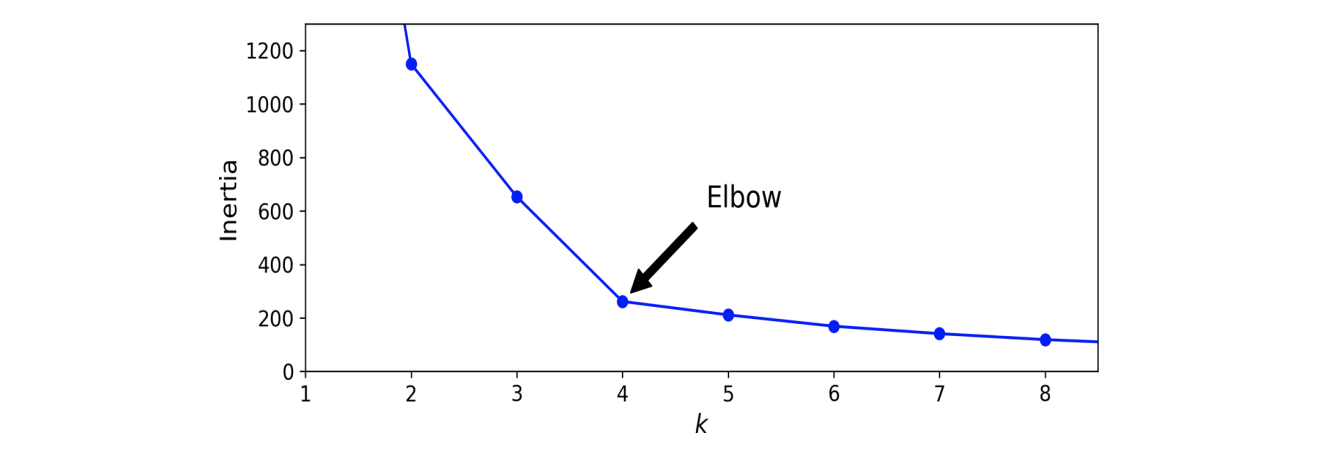

## Silhouette score
- More precise and more computationally expensive approach
- A measure of how similar a sample is to its own cluster compared to the samples in the other clusters
- $a$ (Mean intra-cluster distance) the mean distance of an instance to other instances in the same cluster
- $b$ (Mean nearest-cluster distance) the mean distance between the same instance  and all the other instances in the nearest cluster
- An instance's **silhouette coefficient** is equal to $\frac{b-a}{max(a,b)}$, which vary between -1 and +1

From -1 to +1:
- **Silhouette coefficient** close to +1: the instance is well inside its own cluster and far from other clusters
- **Silhouette coefficient** close to 0: the instance is close to a cluster boudary
- **Silhouette coefficient** close to -1: the instance may have been assigned to the wrong cluster

**Silhouette score**
- Is the mean of **silhouette coefficient** over all the instances (Using scikit-learn's silhouette_score() function)

In [417]:
from sklearn.metrics import silhouette_score

In [421]:
silhouette_score(X, kmeans.labels_) # lalels_ = fit_predict

0.655517642572828

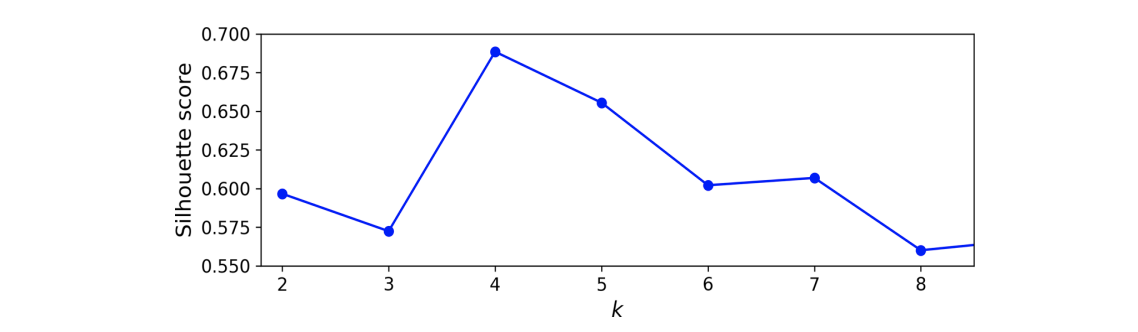
- k = 4 is a very good choice, k = 5 is good as well
- this visualisation is much richer than the previous one

## Clustering is used for Preprocessing
- An efficient preprocessing step before a supervised learning algorithm
- Load the digits dataset, a simple MNIST-like dataset containing 1,797 grayscale 8 x 8 images representing the digits 0 to 9
- Fit the logistic regression model directly, evaluate the accuracy
- Using K-Means as a preprocessing step, then apply a Logistic Regression model, evaluate the accuracy
- Reduced the error rate by almost 30% (from about 3.1% to about 2.2%)

In [478]:
#load data
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42) # default test = 0.25

In [486]:
print(X_digits) #1797 x 64
print(y_digits) #1797 x (1)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [450]:
#fit a Logistic Regression model and evaluate it on the test set:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

In [456]:
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
print("logistic-reg score/Accuracy rate for Logistic only= ", log_reg_score)

logistic-reg score/Accuracy rate=  0.9688888888888889


In [492]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=90, random_state=42)), # The higher n_clusters, the more precise the result is
    ("log_reg", LogisticRegression(multi_class="ovr",
                                   solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=90, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [490]:
pipeline_score = pipeline.score(X_test, y_test)
print("pineline score/Accuracy rate for KMeans and Logistics=", pipeline_score)

pineline score/Accuracy rate for KMeans and Logistics= 0.9822222222222222


## Spectral clustering
- Instead of clustering in the original space, first map data to a new space with reduced dimensinality
- Similarities are made more apparent in there
- Any feature selection or extraction method can be used for this purpose
- Then cluster in the new space

Good things:
- Can capture complex cluster structures
- Can be used to cut graphs
- Identify clusters of friends on social network
- Does not scale well to large numbers of instances
- Does not behave well when the clusters have very different sizes